# Diabetes_KNN

## Importing libraries and Dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv("diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## visualizing data

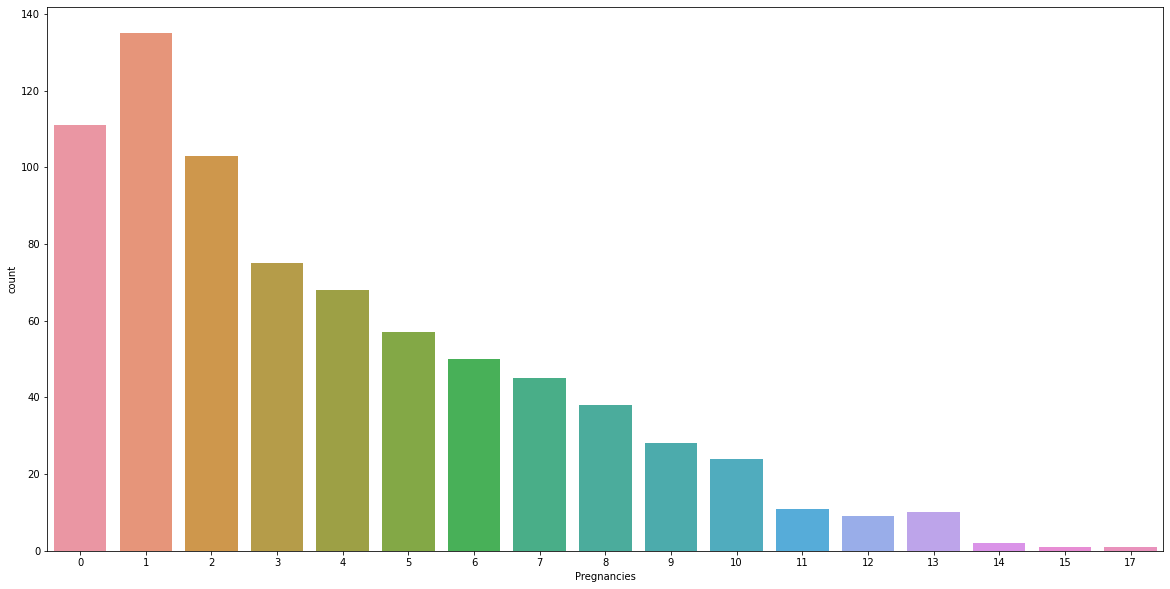

In [3]:
plt.figure(figsize=(20, 10))
sns.countplot(x=diabetes.Pregnancies)
plt.show()

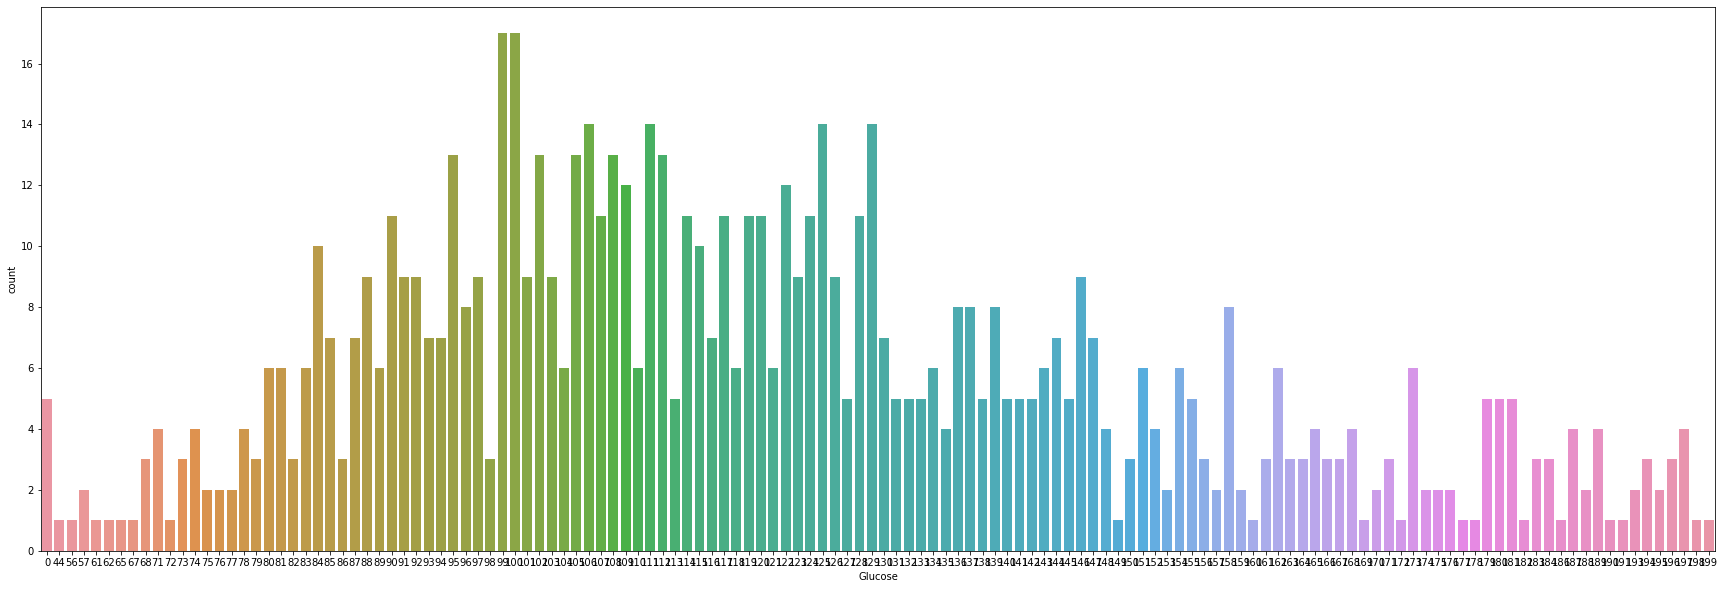

In [4]:
plt.figure(figsize=(30, 10))
sns.countplot(x=diabetes.Glucose)
plt.show()

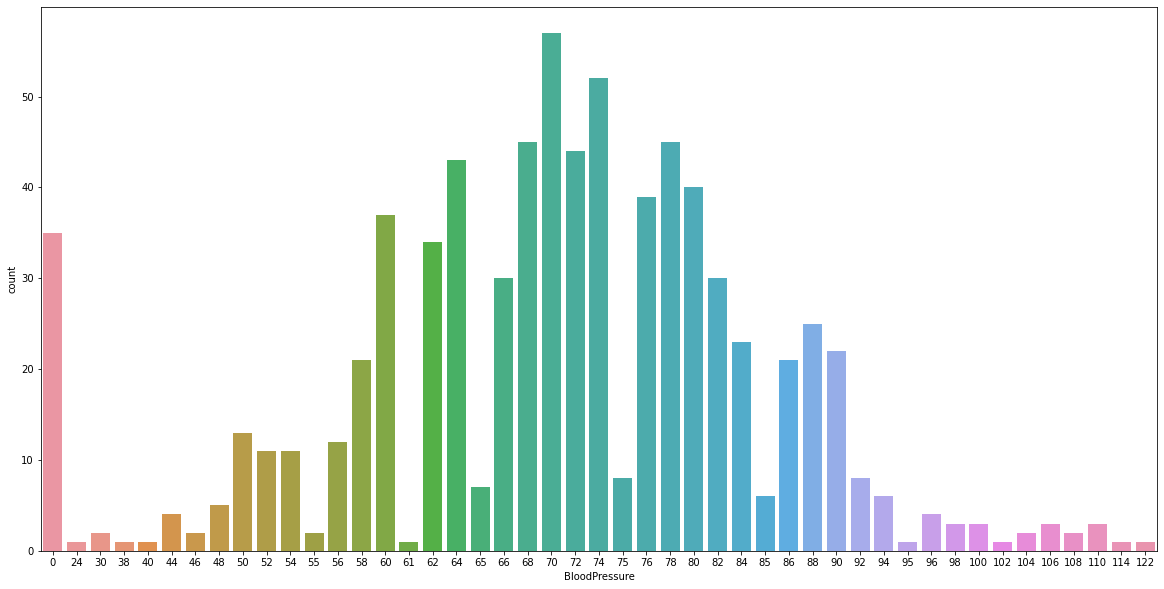

In [5]:
plt.figure(figsize=(20, 10))
sns.countplot(x=diabetes.BloodPressure)
plt.show()

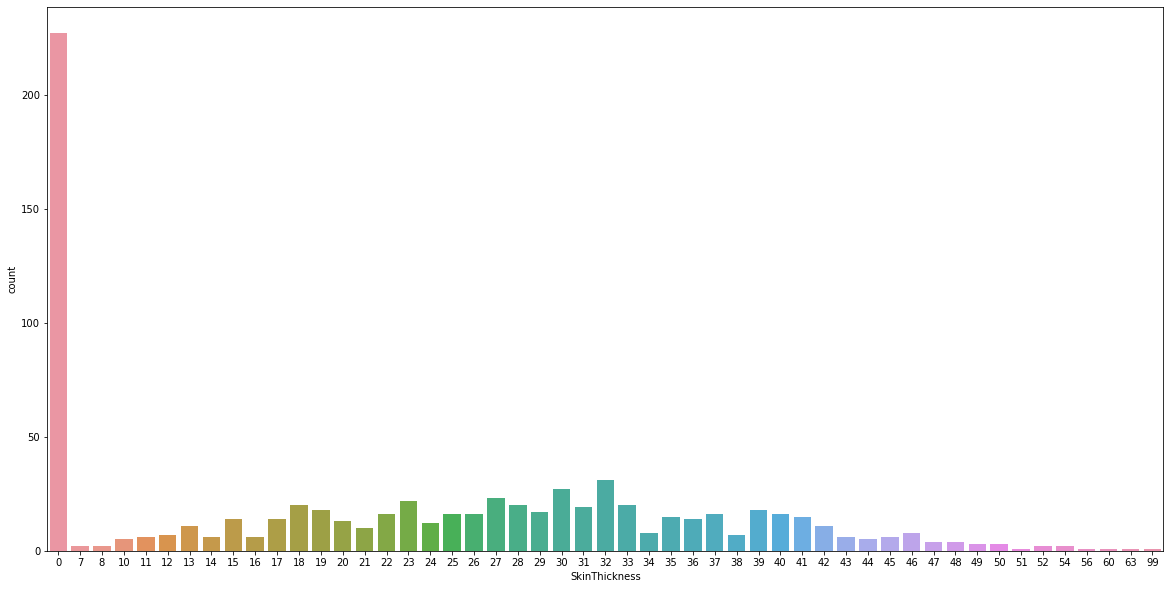

In [6]:
plt.figure(figsize=(20, 10))
sns.countplot(x=diabetes.SkinThickness)
plt.show()

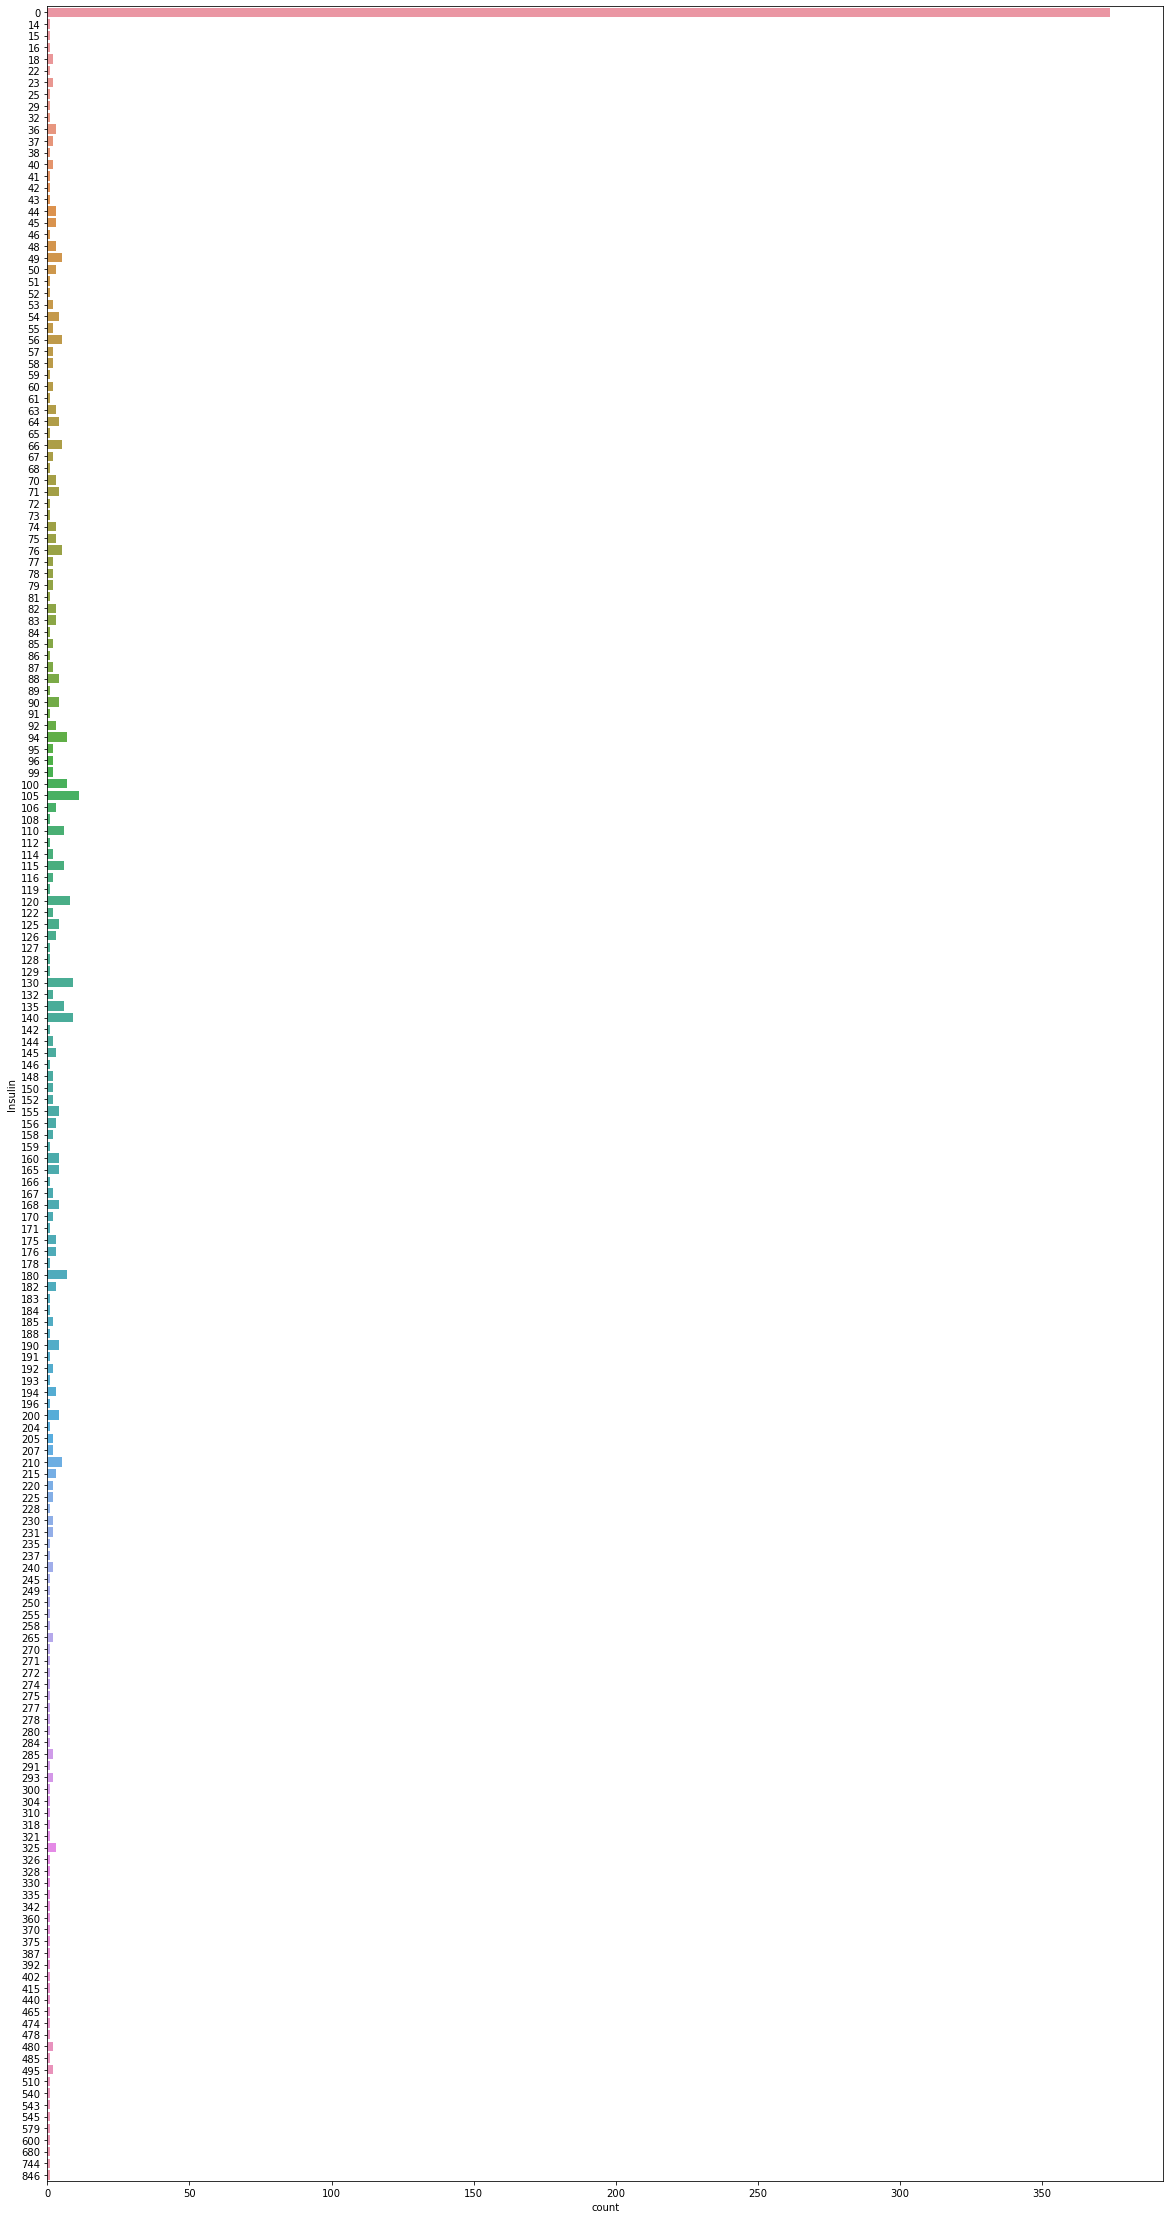

In [7]:
plt.figure(figsize=(20, 40))
sns.countplot(y=diabetes.Insulin)
plt.show()

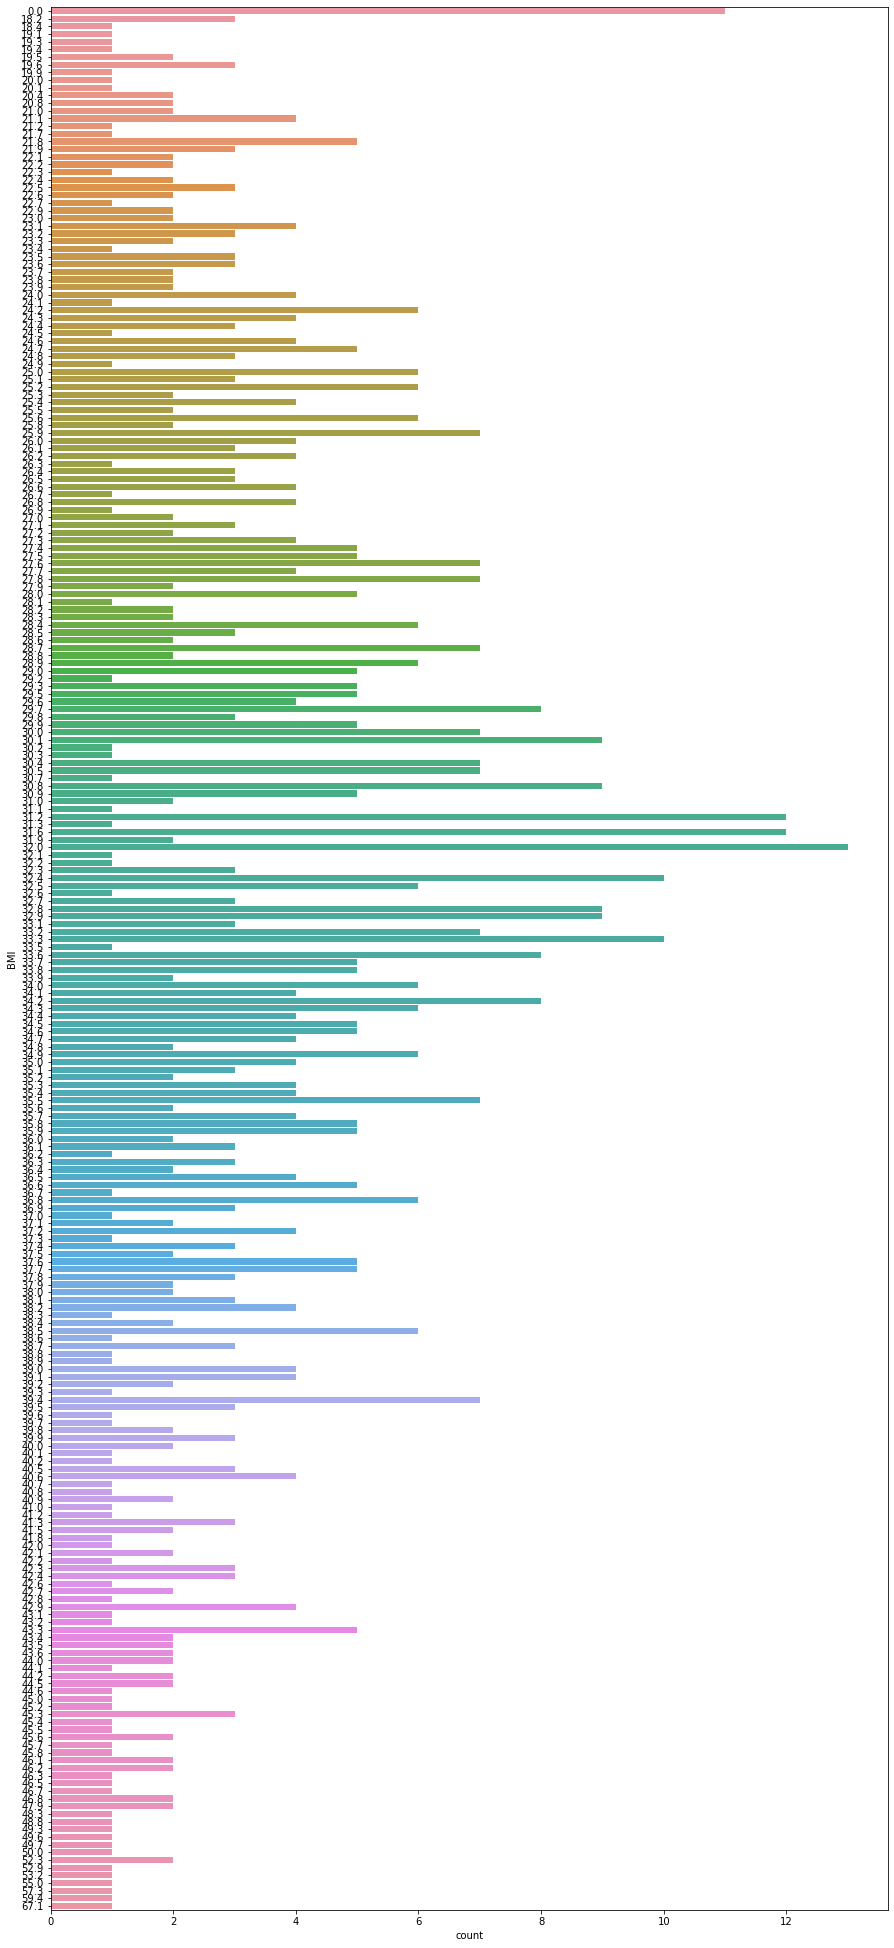

In [8]:
plt.figure(figsize=(15, 35))
sns.countplot(y=diabetes.BMI)
plt.show()

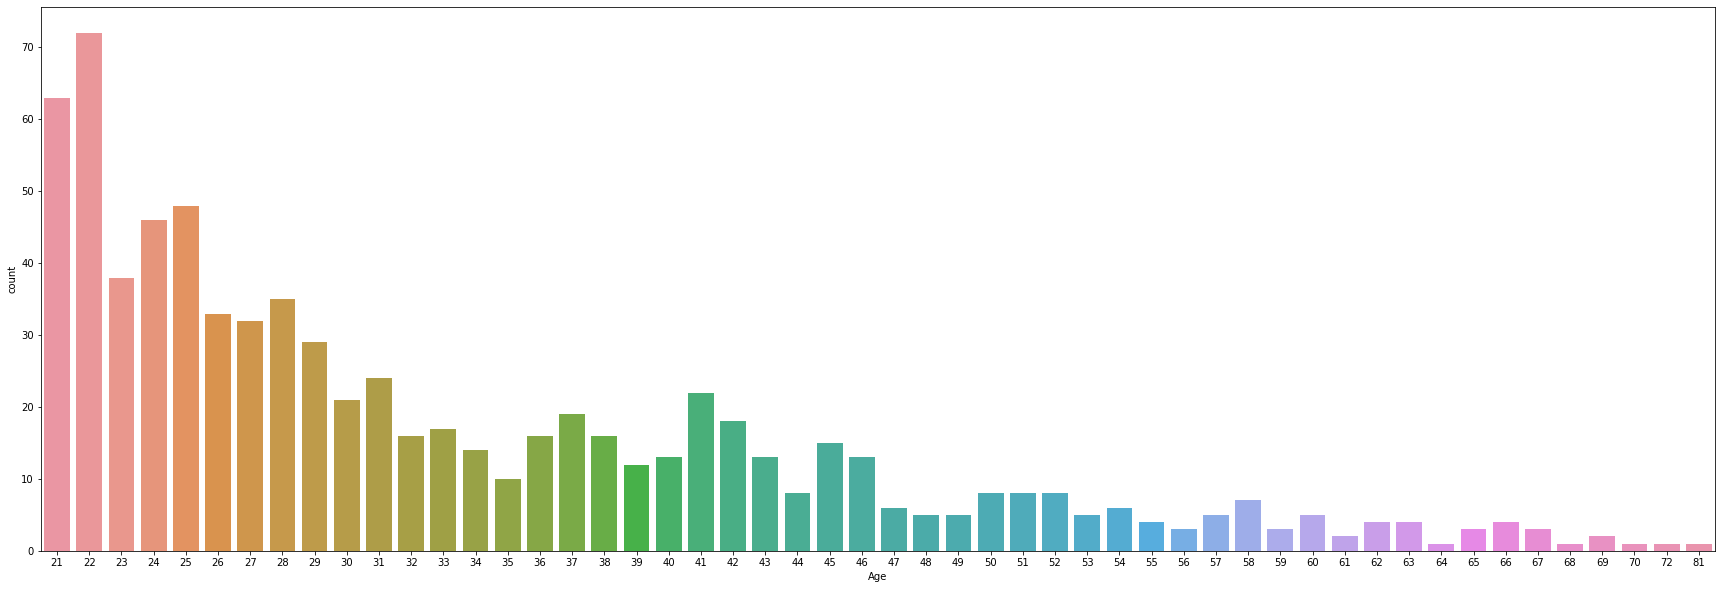

In [9]:
plt.figure(figsize=(30, 10))
sns.countplot(x=diabetes.Age)
plt.show()

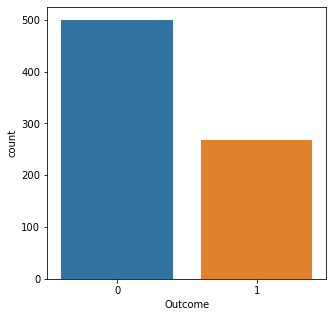

In [10]:
plt.figure(figsize=(5, 5))
sns.countplot(x=diabetes.Outcome)
plt.show()

### Describeing data

In [11]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## cleaning data

In [12]:
df = diabetes.copy()

In [13]:
# Replace zeroes
zero_not_accepted = ["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"]

for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


In [15]:
# verifying cleaned of data

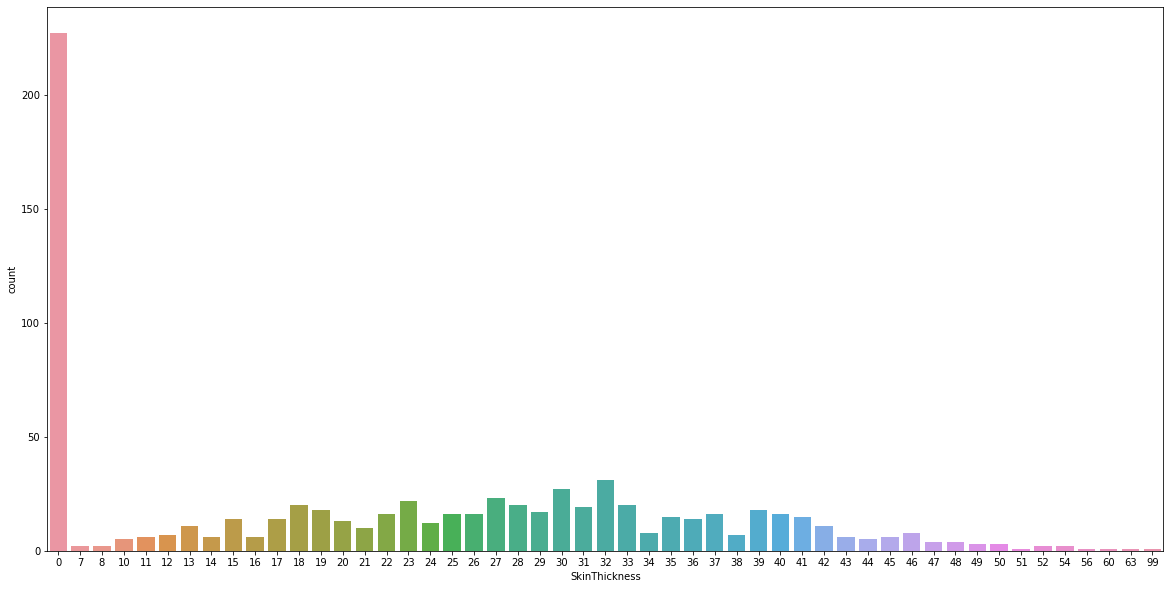

In [16]:
plt.figure(figsize=(20, 10))
sns.countplot(x=diabetes.SkinThickness)
plt.show()

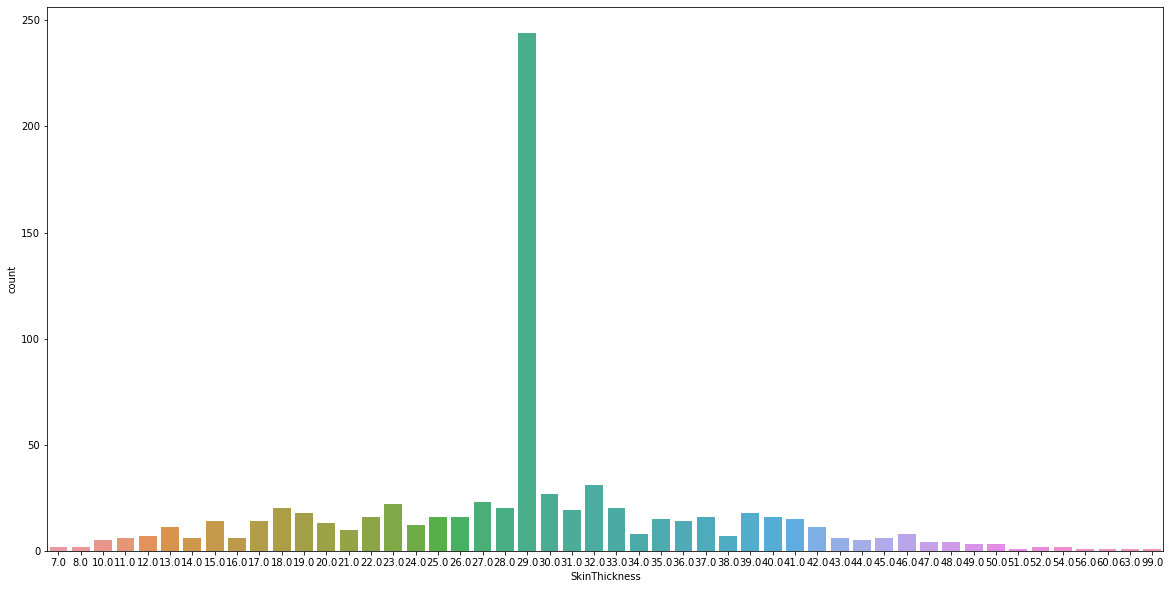

In [17]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df.SkinThickness)
plt.show()

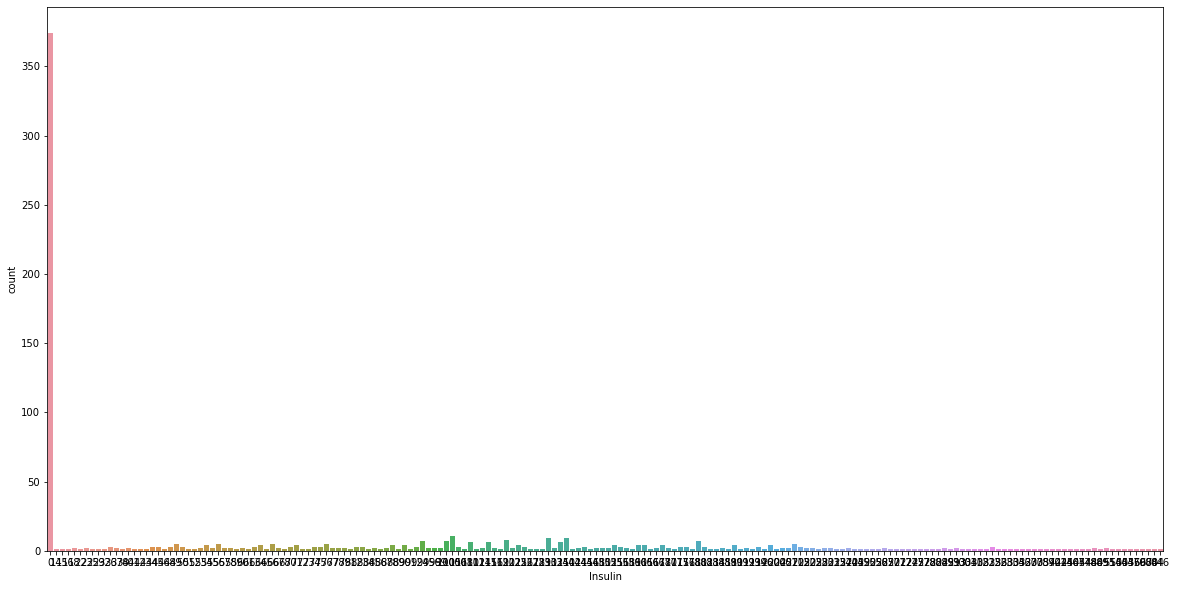

In [18]:
plt.figure(figsize=(20, 10))
sns.countplot(x=diabetes.Insulin)
plt.show()

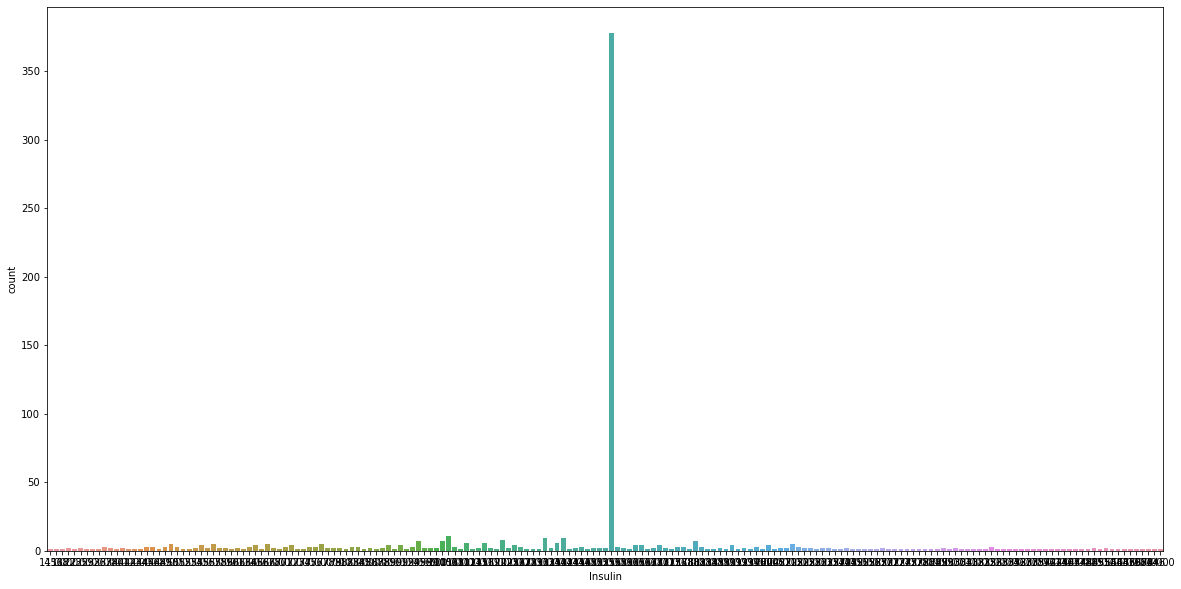

In [19]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df.Insulin)
plt.show()

In [20]:
diabetes = df.copy()

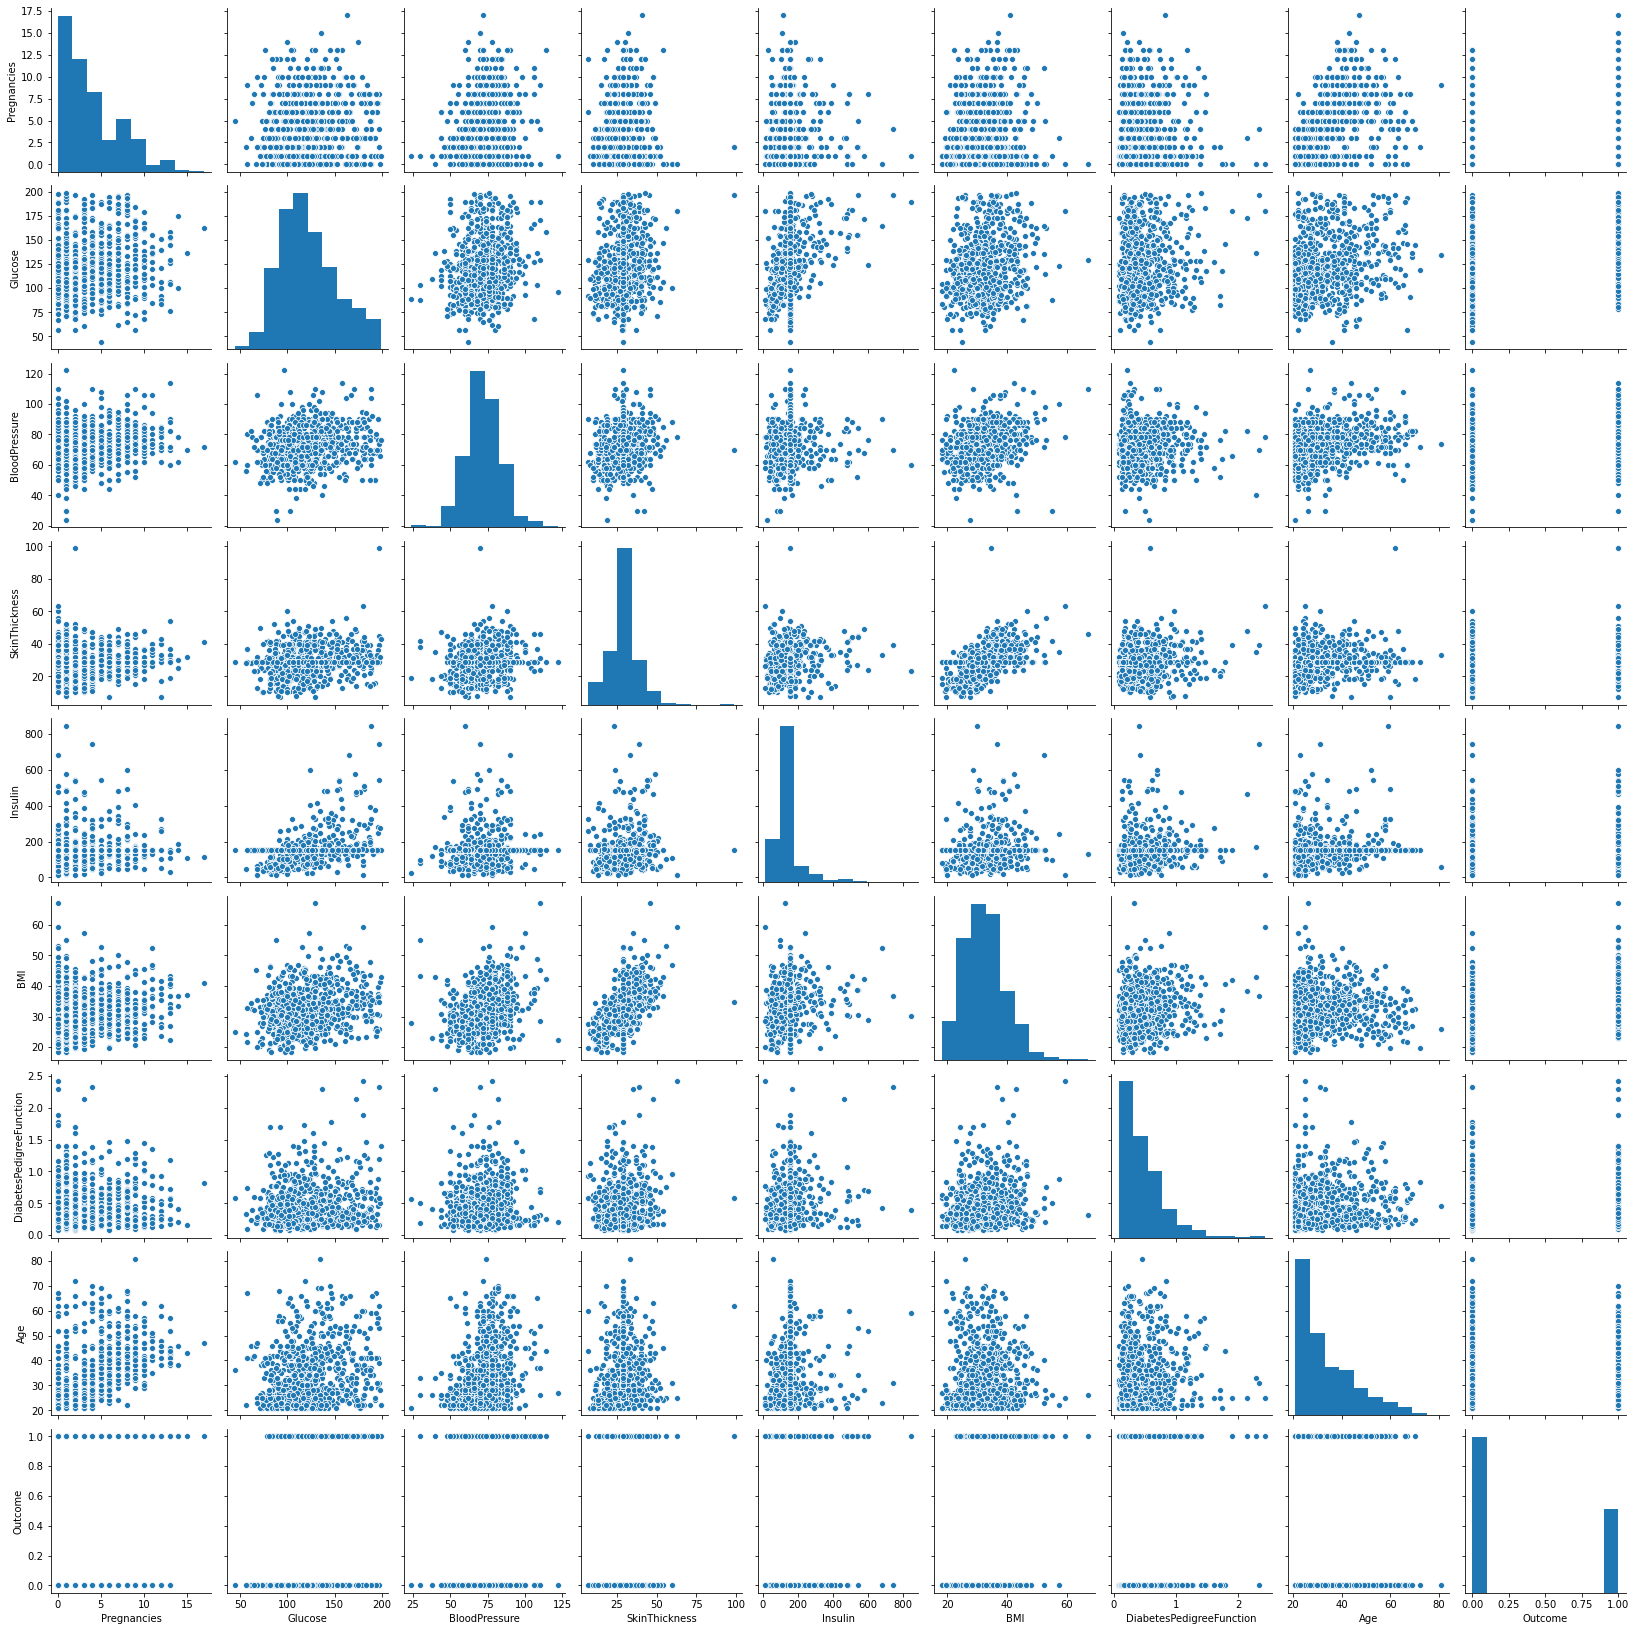

In [21]:
sns.pairplot(data=diabetes)


## splitting data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(diabetes.drop(["Outcome"], axis=1), diabetes.Outcome, random_state=7)

In [23]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90.0,62.0,12.0,43.0,27.2,0.580,24
236,7,181.0,84.0,21.0,192.0,35.9,0.586,51
323,13,152.0,90.0,33.0,29.0,26.8,0.731,43
98,6,93.0,50.0,30.0,64.0,28.7,0.356,23
701,6,125.0,78.0,31.0,155.0,27.6,0.565,49
...,...,...,...,...,...,...,...,...
232,1,79.0,80.0,25.0,37.0,25.4,0.583,22
656,2,101.0,58.0,35.0,90.0,21.8,0.155,22
327,10,179.0,70.0,29.0,155.0,35.1,0.200,37
594,6,123.0,72.0,45.0,230.0,33.6,0.733,34


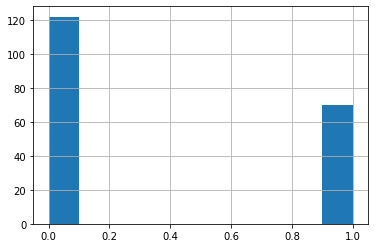

In [24]:
y_test.hist()

In [25]:
192/768

0.25

## Feature scaling

In [26]:
SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.transform(x_test)

In [27]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7
0,-0.846118,-1.014266,-0.826305,-1.903869,-1.391943,-0.777198,0.349930,-0.772301
1,0.960049,1.978011,1.001722,-0.897275,0.492080,0.471902,0.368107,1.581378
2,2.766215,1.024428,1.500275,0.444851,-1.568965,-0.834628,0.807381,0.883992
3,0.659021,-0.915620,-1.823411,0.109320,-1.126409,-0.561836,-0.328672,-0.859474
4,0.659021,0.136609,0.503169,0.221163,0.024235,-0.719768,0.304488,1.407032
...,...,...,...,...,...,...,...,...
187,-0.846118,-1.375970,0.669353,-0.449899,-1.467810,-1.035632,0.359019,-0.946648
188,-0.545090,-0.652563,-1.158674,0.668539,-0.797654,-1.552501,-0.937596,-0.946648
189,1.863132,1.912246,-0.161568,-0.002524,0.024235,0.357042,-0.801269,0.360952
190,0.659021,0.070845,0.004616,1.786977,0.972569,0.141680,0.813440,0.099432


## Model building

In [28]:
classifier = KNeighborsClassifier(n_neighbors=15, p=2, metric="euclidean")

- K = 11 as SqureRoot of len(y_test) is 12, which is an even number so choose an odd number to resolve the conflicts if arise in voting the dicisison.

- p = 2 as we are classifing whether patient has diabers or not. (0 or 1)

- metric = "euclidean" to measure the distance.

In [29]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

## Evaluating model

In [30]:
y_pred = classifier.predict(x_test)
con_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
np.transpose(con_matrix)

array([[104,  27],
       [ 18,  43]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       122
           1       0.70      0.61      0.66        70

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.76      0.77      0.76       192

